In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle as pkl
import imageio
import time
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models 
from keras.models import Model

from keras import layers
from keras.utils import to_categorical 
from keras.optimizers import RMSprop, Adam
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten, GlobalAveragePooling2D


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
data_dir = '/Users/burakcivitcioglu/Documents/Work/MachineLearning-IsingModel2D/drive-download-20200428T104109Z-001/SQ_L_100_500'
lattice_size = 100
input_shape_img = (lattice_size,lattice_size,3)

In [4]:
training_set = train_datagen.flow_from_directory(
        data_dir,
        subset='training',
        target_size=(lattice_size, lattice_size),
        class_mode='categorical',
        shuffle=True)
validation_set= train_datagen.flow_from_directory(
                                              data_dir,
                                              subset='validation', 
                                              target_size = (lattice_size,lattice_size),
                                              class_mode='categorical',
                                              shuffle=True)


Found 64800 images belonging to 81 classes.
Found 16200 images belonging to 81 classes.


In [ ]:
num_class = 81

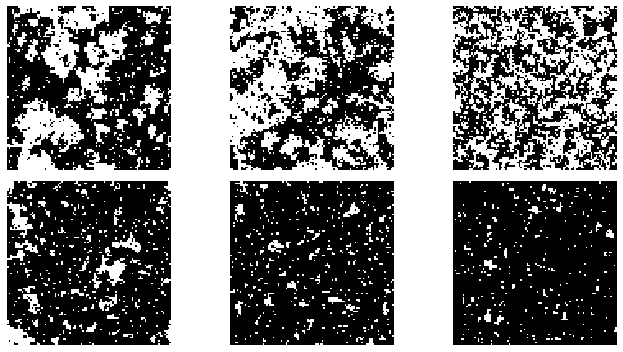

In [5]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in validation_set:
        plt.imshow(x[0],cmap='hsv')
        #plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

In [15]:
# As usual we start by creating a sequential model
model_cnn = models.Sequential()

# We add the convolutional layer
model_cnn.add(Conv2D(filters=25, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',input_shape=input_shape))
# The batch normalization: helping to generalize the training
model_cnn.add(BatchNormalization())
# Another convolutional layer
model_cnn.add(Conv2D(filters=25, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
# Batch normalization
model_cnn.add(BatchNormalization())
# Pooling for reducing overfitting
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same' ))
# We drop some neurons that will again help avoid overfitting
model_cnn.add(Dropout(0.25))

# We will add another series of the above with greater number of filters
model_cnn.add(Conv2D(filters=75, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(filters=75, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2), padding='same', strides=2))
model_cnn.add(Dropout(0.25))

# Flatten will convert our results to 1D type
model_cnn.add(Flatten())
model_cnn.add(Dense(1000, activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.25))
model_cnn.add(Dense(500, activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.5))
# We have the final output layer
model_cnn.add(Dense(num_class, activation='softmax'))

In [16]:
model_cnn.compile(optimizer=RMSprop(learning_rate= 0.00001), loss="categorical_crossentropy", metrics=["accuracy"])
model_cnn.summary()

In [18]:
train_cnn = model_cnn.fit(training_set,
                         epochs = 100,
                         validation_data = validation_set)
model_cnn.save('cnn_100')

Epoch 1/1
  13/2025 [..............................] - ETA: 1:00:23 - loss: 5.9305 - accuracy: 0.0216

KeyboardInterrupt: 